
# Spam Detection Classifier Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score,ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [2]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-07-11 11:05:21--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.89MB/s    in 0.3s    

2023-07-11 11:05:22 (1.89 MB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

#axis =1 is column

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#renaming
df.columns =['labels','data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

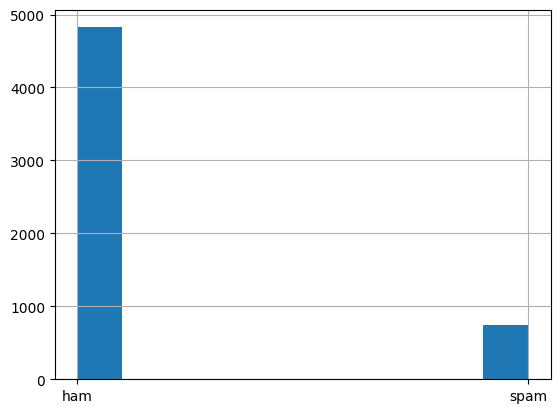

In [7]:
df.labels.hist()
# see that we have imbalanced data. Ham > spam/ So we have to check F1 SCORE

In [8]:
#we have to rename all the ham & spam to 1 and 0
# must create a new column with 1 - 0

df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
Y= df['b_labels'].to_numpy()

df.head(4)

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0


In [9]:
#have a data. we need to split data uje

df_train, df_test, Ytrain, Ytes = train_test_split(df['data'], Y)


In [10]:
featurizer = CountVectorizer(decode_error='ignore')

Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

# passing X matrices values to the xtrain and xtest, decode ingone for erroring utf message error

In [11]:
Xtrain
#sparse mean that matrix has a lot of 0

<4179x7479 sparse matrix of type '<class 'numpy.int64'>'
	with 55235 stored elements in Compressed Sparse Row format>

In [12]:
#crate the model, train it, and get score


model=MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train acc:', model.score(Xtrain, Ytrain))
print('test acc:', model.score(Xtest, Ytes))

train acc: 0.9947355826752812
test acc: 0.9820531227566404


In [13]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [14]:
print ('train_f1:' , f1_score(Ytrain, Ptrain))
print ('test_f1:', f1_score(Ytes, Ptest))

train_f1: 0.9802513464991023
test_f1: 0.930747922437673


In [15]:
#check roc auc. Need proba function

Proba_train = model.predict_proba(Xtrain)[:,1]
Proba_test = model.predict_proba(Xtest)[:,1]

print ('train_ACU:' , roc_auc_score(Ytrain, Proba_train))
print ('test_AUC:', roc_auc_score(Ytes, Proba_test))

train_ACU: 0.9948062823493777
test_AUC: 0.9657996273444779


In [16]:
cm = confusion_matrix(Ytrain, Ptrain)
cm
#need confusion matrix, Ytrain, and the trained one at the first.



array([[3611,   10],
       [  12,  546]])

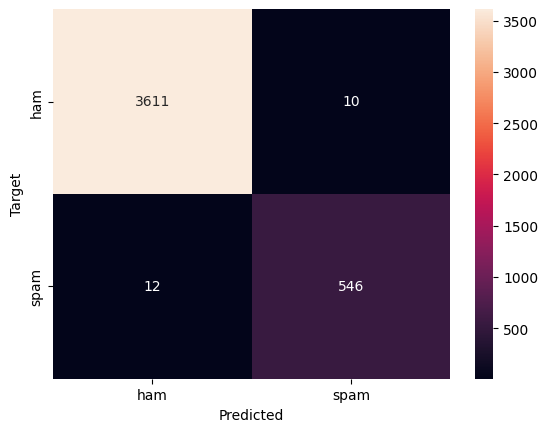

In [17]:
#for better visual lets plot CM

def plot_cm(cm):

  classes=['ham', 'spam']
  df_cm=pd.DataFrame(cm, index=classes, columns=classes)

  ax = sn.heatmap(df_cm, annot= True, fmt='g')

  ax.set_xlabel('Predicted')
  ax.set_ylabel('Target')

plot_cm(cm)

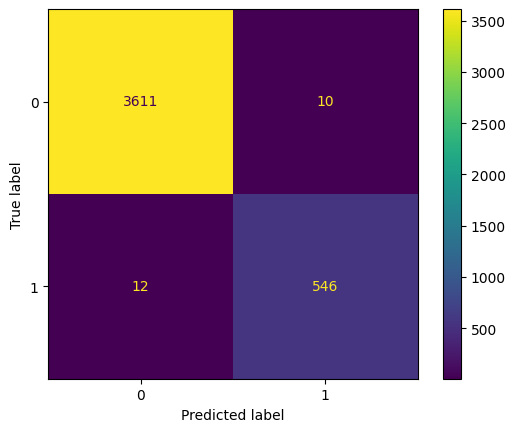

In [19]:
#plotting again CM via Sklearn

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

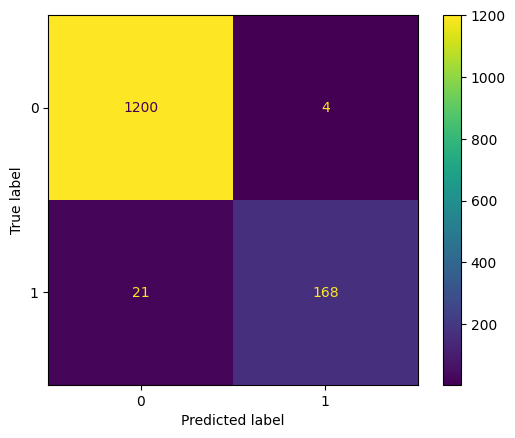

In [20]:
cm_test=confusion_matrix(Ytes, Ptest)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=model.classes_)
disp2.plot()

In [21]:
#see words in spam or ham

def visualise(label):
  words=''

  for msg in df[df['labels']==label]['data']:
    msg=msg.lower()
    words+=msg+''


  wordcloud=WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.show()

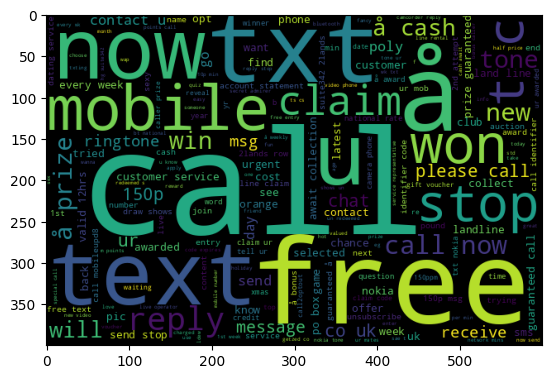

In [22]:
visualise('spam')

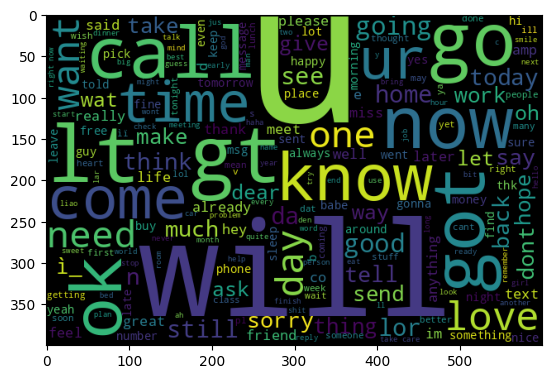

In [23]:
visualise('ham')

In [24]:
X = featurizer.transform(df['data'])

df['predcitions']=model.predict(X)
df.head()

,labels,data,b_labels,predcitions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [26]:
sneaky_spam = df[(df.predcitions==0) & (df.b_labels==1)]['data']

for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA
0A$NETWORKS allow companies to bill for SMS, so they are responsible for their \suppliers\"
FreeMsg:Feelin kinda lnly hope u like 2 keep me company! Jst got a cam moby wanna c my pic?Txt or reply DATE to 82242 Msg150p 2rcv Hlp 08

In [27]:
not_actually_spam = df[(df.predcitions==1) & (df.b_labels==0)]['data']

for msg in not_actually_spam:
  print(msg)

Waiting for your call.
Can u get pic msgs to your phone?
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
Received, understood n acted upon!
I liked the new mobile
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
